In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")
df = pd.DataFrame(data)

In [ ]:
# Display basic info
print("Data Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Data Overview:
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                   

In [ ]:
# 1. Z-Score Method for Outlier Detection
def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data)
    return np.where(np.abs(z_scores) > threshold)

In [ ]:
# Detecting outliers for numeric columns
for column in df.select_dtypes(include=np.number).columns:
    outliers_z = detect_outliers_zscore(df[column])
    print(f"\nOutliers in {column} using Z-score:")
    print(outliers_z[0])


Outliers in id using Z-score:
[]

Outliers in model_year using Z-score:
[   456    461    531 ... 188089 188189 188222]

Outliers in milage using Z-score:
[    28    195    517 ... 188047 188160 188523]

Outliers in price using Z-score:
[   220    267    296 ... 188022 188192 188194]


In [ ]:
# 2. IQR Method for Outlier Detection
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [ ]:
# Detecting outliers using IQR for numeric columns
for column in df.select_dtypes(include=np.number).columns:
    outliers_iqr = detect_outliers_iqr(df[column])
    print(f"\nOutliers in {column} using IQR:")
    print(outliers_iqr)


Outliers in id using IQR:
Series([], Name: id, dtype: int64)

Outliers in model_year using IQR:
1         2002
2         2002
59        2001
81        2000
88        2002
          ... 
188464    2002
188475    2000
188477    2000
188479    2002
188527    1999
Name: model_year, Length: 5132, dtype: int64

Outliers in milage using IQR:
0         213000
10        212500
28        244200
195       269885
424       215000
           ...  
187708    245000
188047    249083
188092    205000
188160    220000
188523    239000
Name: milage, Length: 1766, dtype: int64

Outliers in price using IQR:
31        104900
36        165000
43        244896
44        145000
65        193063
           ...  
188463    199991
188469    149900
188476    267950
188485    115000
188501    129000
Name: price, Length: 10880, dtype: int64


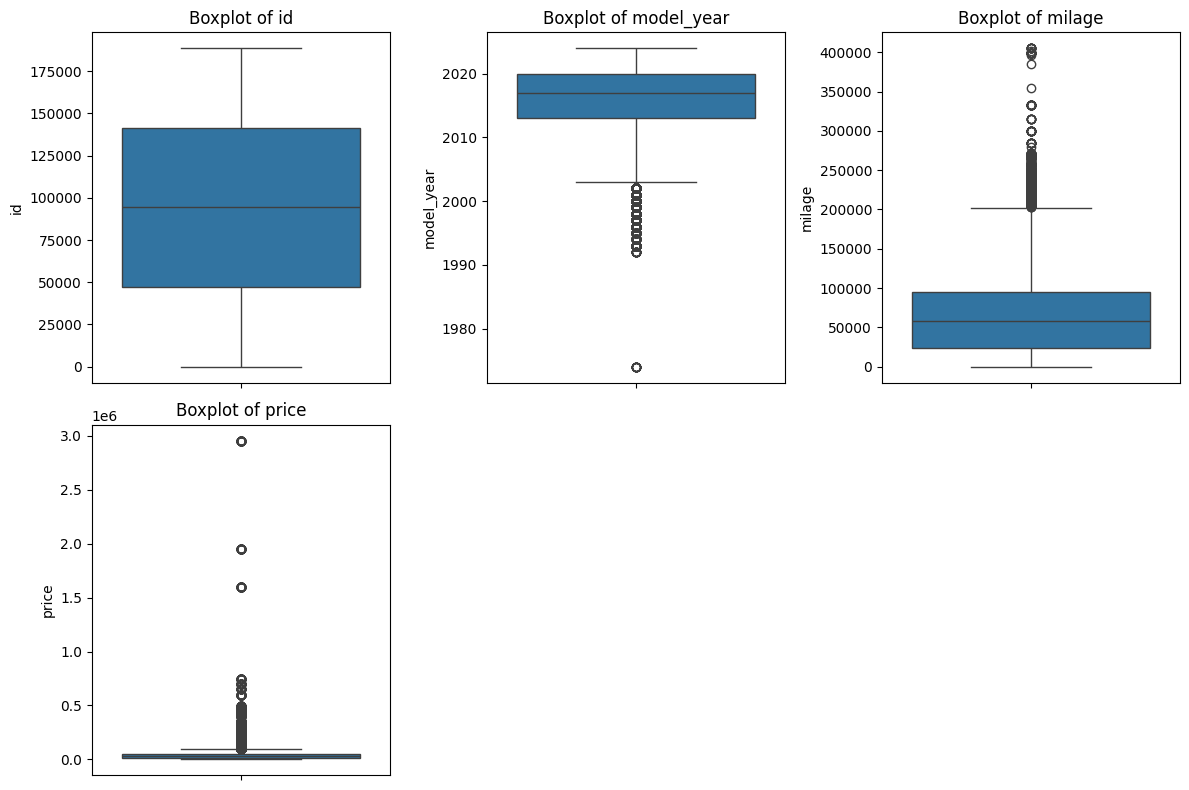

In [ ]:
# 3. Visualizing Outliers Using Boxplot
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()